In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
gram = pd.read_csv('./Grammar/Bootstraps/bootstrap_4000_super_alpha0.csv', encoding='utf-8')
lsat = pd.read_csv('./LSAT/DKrep/Bootstraps/bootstrap_4000_super_alpha0.csv', encoding='utf-8')

In [3]:
n = 1000
gram['L0'] = [-n/2 * (1 + np.log(2*np.pi*(s/n))) for s in gram.SSE0]
gram['L1'] = [-n/2 * (1 + np.log(2*np.pi*(s/n))) for s in gram.SSE1]

lsat['L0'] = [-n/2 * (1 + np.log(2*np.pi*(s/n))) for s in lsat.SSE0]
lsat['L1'] = [-n/2 * (1 + np.log(2*np.pi*(s/n))) for s in lsat.SSE1]

In [4]:
# lists of summed log likelihoods

l0s = []
for i in range(len(gram['L0'])):
    l0s.append(gram['L0'][i] + lsat['L0'][i])

l1s = []
for i in range(len(gram['L1'])):
    l1s.append(gram['L1'][i] + lsat['L1'][i])

In [5]:
# calculate additive lr tests and see how many are above threshold

lrs = []
for i in range(len(l1s)):
    lrs.append(2*(l1s[i] - l0s[i]))

    
above_thresh = 0
for lr in lrs:
    if lr > 3.84:
        above_thresh += 1
above_thresh

859

In [3]:
import matplotlib as mpl
plt.style.use('ggplot')
mpl.rc('font',family='Times New Roman')

tbfont = {'fontname': 'Times New Roman Bold'}
tfont = {'fontname':'Times New Roman'}

mpl.rc('text', usetex=True)

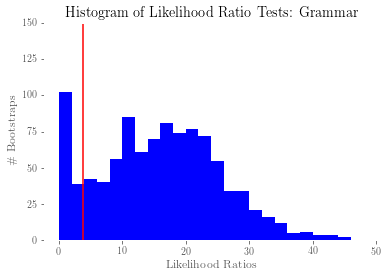

In [29]:
fig,ax = plt.subplots()
plt.hist(gram.LR,color='b',bins=[0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,
                                 44,46,48])
plt.axvline(x=3.84, color = 'r')
plt.title('Histogram of Likelihood Ratio Tests: Grammar')
ax.set_xlabel('Likelihood Ratios')
ax.set_ylabel('\# Bootstraps')
ax.set_yticks([0,25,50,75,100,125,150])


ax.set_facecolor('white')
plt.grid(False)
plt.show()

# fig.savefig('figs/Bootstrap_LRs4000_super_alpha0_gram.eps', dpi=1000)

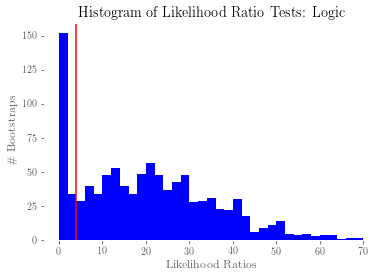

In [30]:
fig,ax = plt.subplots()
plt.hist(lsat.LR,color='b',bins=[0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,
                                 44,46,48,50,52,54,56,58,60,62,64,66,68,70])
plt.axvline(x=3.84, color = 'r')
plt.title('Histogram of Likelihood Ratio Tests: Logic')
ax.set_xlabel('Likelihood Ratios')
ax.set_ylabel('\# Bootstraps')
ax.set_yticks([0,25,50,75,100,125,150])


ax.set_facecolor('white')
plt.show()

# fig.savefig('figs/Bootstrap_LRs4000_super_alpha0_lsat.eps', dpi=1000)